# import packages

In [1]:
import pandas as pd 
import re
import numpy as np 
import tejapi
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.pyplot import MultipleLocator
from sklearn.linear_model import LinearRegression
import datetime



In [2]:
api_key = 'your_key'
tejapi.ApiConfig.api_key = api_key
tejapi.ApiConfig.ignoretz = True

In [3]:
stock_id = ["Y9997", "2317", "2324", "2327", "2330", "2347", "2353", "2354",
            "2357", "2379", "2382", "2395"]
gte, lte = '2018-01-01', '2020-12-31'
stock = tejapi.get('TWN/APRCD',
                   paginate = True,
                   coid = stock_id,
                   mdate = {'gte':gte, 'lte':lte},
                   opts = {
                       'columns':[ 'mdate', 'coid', 'open_d', 'high_d', 'low_d', 'close_d', 'volume']
                   }
                  )

In [4]:
stock

,mdate,coid,open_d,high_d,low_d,close_d,volume
None,,,,,,,
0,2018-01-02,2317,95.4,95.7,94.3,95.00,28602.316
1,2018-01-03,2317,95.0,95.3,94.0,94.00,58507.086
2,2018-01-04,2317,93.6,93.9,92.5,92.60,53756.400
3,2018-01-05,2317,92.3,93.0,91.6,93.00,59252.732
4,2018-01-08,2317,92.3,92.6,91.7,91.80,50081.699
...,...,...,...,...,...,...,...
8803,2020-12-25,Y9997,NaN,NaN,NaN,27667.00,7354213.000
8804,2020-12-28,Y9997,NaN,NaN,NaN,27959.77,8522466.000
8805,2020-12-29,Y9997,NaN,NaN,NaN,27938.50,9485864.000


In [5]:
data_pivot = pd.pivot_table(stock[stock.coid != "Y9997"], columns="coid", index="mdate")
data_pivot

close_d                                                         \
coid          2317   2324   2327   2330   2347   2353  2354   2357   2379   
mdate                                                                       
2018-01-02    95.0  21.10  354.0  232.5  40.85  23.85  85.0  278.0  109.0   
2018-01-03    94.0  20.95  389.0  237.0  41.70  24.10  85.1  277.0  109.5   
2018-01-04    92.6  20.90  398.5  239.5  41.80  24.20  85.1  271.0  110.5   
2018-01-05    93.0  21.10  404.0  240.0  42.25  24.30  85.3  272.0  112.5   
2018-01-08    91.8  21.25  400.0  242.0  42.10  25.65  85.3  274.0  112.5   
...            ...    ...    ...    ...    ...    ...   ...    ...    ...   
2020-12-25    91.8  20.60  500.0  511.0  46.70  23.75  53.7  248.0  400.5   
2020-12-28    91.8  20.80  502.0  515.0  47.05  23.90  54.0  250.0  397.0   
2020-12-29    90.4  20.95  506.0  515.0  46.90  23.70  53.4  250.5  388.0   
2020-12-30    91.6  20.90  521.0  525.0  46.75  23.75  53.6  252.5  391.5   
2020-12-31    92.0  20.70  518.0  530.0  47.00  23.65  53.4  250.5  390.5   

                  ...     volume                                             \
coid        2382  ...       2324       2327       2330      2347       2353   
mdate             ...                                                         
2018-01-02  61.9  ...   6065.179   2296.056  18055.269  1740.536  32880.482   
2018-01-03  62.6  ...   8964.080   4314.426  31706.091  6466.626  30506.383   
2018-01-04  62.9  ...   9839.702  10054.872  29179.613  6431.642  36159.894   
2018-01-05  61.8  ...   6418.109   5525.408  23721.255  4815.835  22912.467   
2018-01-08  62.6  ...   6091.436   3246.155  21846.692  4294.343  89720.373   
...          ...  ...        ...        ...        ...       ...        ...   
2020-12-25  79.8  ...   7066.525   8955.496  12581.145  2005.436   8603.097   
2020-12-28  80.9  ...  10292.745   6030.014  19520.886  3297.197  11757.791   
2020-12-29  80.4  ...  13315.837   9311.044  20226.736  3089.962  10842.105   
2020-12-30  81.0  ...  10258.197  12657.574  46705.107  2787.543   9703.667   
2020-12-31  80.9  ...   9022.225   9508.661  31173.332  1908.864   8667.777   

                                                               
coid            2354      2357      2379       2382      2395  
mdate                                                          
2018-01-02  1114.092   365.552   255.352   2783.538   979.077  
2018-01-03  2229.861  1068.681  1197.281  12171.169  1470.373  
2018-01-04  2621.615  1712.792   664.630   8196.231  1400.344  
2018-01-05  2195.899  2414.104  1239.283   7424.266  1302.605  
2018-01-08  1943.234  1224.326   852.936   3713.980  3352.287  
...              ...       ...       ...        ...       ...  
2020-12-25  7815.184  1748.776  1282.964   4628.739   226.655  
2020-12-28  5124.154  1529.758  1520.464   6729.287   502.896  
2020-12-29  4075.172   982.252  3483.169   3972.175   365.399  
2020-12-30  3911.754  1642.306  3160.319   4209.798   902.874  
2020-12-31  6403.817  1744.522  1908.701   4113.407   812.071  

[734 rows x 55 columns]

# define strategy

In [6]:
def Aroon_strategy_multi(data_pivot, principal, cash, order_unit, n):
    trade_book = pd.DataFrame() 
    aroon = pd.DataFrame(columns=["coid", "mdate", "AroonUp", "AroonDown"])

    daily_stock_value_record = []
    daily_cash_value_record = []
    
    coid_dict = {}
    for i in list(data_pivot.high_d.columns):
        coid_dict.update({i:{"position":0, "invested_principal":0}})
    
    for ind in range(len(data_pivot.index) - n -1):
        for col in data_pivot.high_d.columns:
            high_period = data_pivot.high_d[col].iloc[ ind : ind+n].reset_index()
            AroonUp = round((high_period.idxmax()[1] + 1)/n*100)

            low_period = data_pivot.low_d[col].iloc[ ind : ind+n].reset_index()
            AroonDown = round(((low_period.idxmin()[1] + 1)/n*100))
            
            
            aroon = aroon.append({
                "coid":col,
                "mdate":data_pivot.index[ind+n],
                "AroonUp":AroonUp,
                "AroonDown":AroonDown,
            }, ignore_index=True)
            
            n_time = data_pivot.index[ind+n+1]
            n_open = data_pivot.open_d[col].iloc[ind+n+1]


            if coid_dict.get(col).get("position") == 0: #進場條件
                if (AroonDown < 45) and (AroonUp > 80):
                    position = coid_dict.get(col).get("position")
                    
                    order_time = n_time
                    order_price = n_open
                    order_unit = 1
                    friction_cost = (20 if order_price*1000*0.001425 < 20 else order_price*1000*0.001425)
                    total_cost = -1 * order_price * 1000 - friction_cost
                    cash += total_cost
                    
                    coid_dict.update({col:{"position":position+1, "invested_principal":order_price * 1000,}})                    
                    
                    trade_book = pd.concat([trade_book,
                                           pd.DataFrame([col, 'Buy', order_time, 0,  total_cost, order_unit, coid_dict.get(col).get("position"), cash, order_price])],
                                           ignore_index = True, axis=1)

            elif coid_dict.get(col).get("position") > 0:
                if (AroonDown - AroonUp) > 15 and AroonDown > 55 and AroonUp < 45: # 出場條件
                    order_unit = coid_dict.get(col).get("position")
                    cover_time = n_time
                    cover_price = n_open
                    friction_cost = (20 if cover_price*order_unit*1000*0.001425 < 20 else cover_price*order_unit*1000*0.001425) + cover_price*order_unit*1000*0.003
                    total_cost = cover_price*order_unit*1000-friction_cost
                    cash += total_cost
                    
                    coid_dict.update({col:{"position":0, "invested_principal":0}})                    

                    trade_book = pd.concat([trade_book,
                                           pd.DataFrame([col, 'Sell', 0, cover_time,  total_cost, -1*order_unit, coid_dict.get(col).get("position"), cash, cover_price])],
                                           ignore_index = True, axis=1)

                elif (AroonUp - AroonDown) > 15 and (AroonDown < 45) and AroonUp > 55 and (cash >= n_open*1000) and (coid_dict.get(col).get("invested_principal") <= 0.2 * principal): #加碼條件
                    order_unit = 1
                    order_time = n_time
                    order_price = n_open

                    position = coid_dict.get(col).get("position")

                    friction_cost = (20 if order_price*1000*0.001425 < 20 else order_price*1000*0.001425) 
                    total_cost = -1 * order_price * 1000 - friction_cost
                    cash += total_cost
                    
                    invested_principal = coid_dict.get(col).get("invested_principal")
                    coid_dict.update({col:{"position":position+1, "invested_principal": invested_principal + order_price*1000}})                    

                    trade_book = pd.concat([trade_book,
                                           pd.DataFrame([col, 'Buy', order_time, 0, total_cost, order_unit, coid_dict.get(col).get("position"), cash, order_price])],
                                           ignore_index = True, axis=1)
                    
            daily_stock_value_record.append({
                "mdate": n_time,
                "coid":col,
                "position":coid_dict.get(col).get("position"),
                "stock_value":coid_dict.get(col).get("position") * data_pivot.close_d[col].iloc[ind+n+1] * 1000,
            })
        daily_cash_value_record.append(cash)

    for col in data_pivot.high_d.columns:# 最後一天平倉

        if coid_dict.get(col).get("position") > 0: 
            
            high_period = data_pivot.high_d[col].iloc[ -n : -1].reset_index()
            AroonUp = round((high_period.idxmax()[1] + 1)/n*100)
            low_period = data_pivot.low_d[col].iloc[ -n : -1].reset_index()
            AroonDown = round(((low_period.idxmin()[1] + 1)/n*100))
            
            order_unit = coid_dict.get(col).get("position")
            cover_price = data_pivot.open_d[col].iloc[-1]
            cover_time = data_pivot.index[-1]
            friction_cost = (20 if cover_price*order_unit*1000*0.001425 < 20 else cover_price*order_unit*1000*0.001425) + cover_price*order_unit*1000*0.003
            cash += cover_price*order_unit*1000-friction_cost
            
            coid_dict.update({col:{"position":0, "invested_principal": 0,}})                    

            trade_book = pd.concat([trade_book,
                                   pd.DataFrame([col, 'Sell',0, cover_time, cover_price*order_unit*1000-friction_cost, -1*order_unit, 0, cash, cover_price])],
                                   ignore_index=True, axis=1)
            
            daily_stock_value_record.append({
                "mdate": data_pivot.index[-1]+datetime.timedelta(days = 1),
                "coid":col,
                "position":coid_dict.get(col).get("position"),
                "stock_value":0,
            })
        
    daily_cash_value_record.append(cash)
    value_book = pd.DataFrame(daily_stock_value_record).set_index("mdate")
    value_book = pd.pivot_table(value_book, columns = "coid", index = "mdate")
    value_book["cash_value"] = daily_cash_value_record

            
    trade_book = trade_book.T
    trade_book.columns = ['coid', 'BuyOrSell', 'BuyTime', 'SellTime', 'CashFlow','TradeUnit', 'HoldingPosition', 'CashValue', 'DealPrice']
    trade_book['mdate'] = [trade_book.BuyTime[i] if trade_book.BuyTime[i] != 0 else trade_book.SellTime[i] for i in trade_book.index]
    trade_book = trade_book.loc[:, ['coid', 'BuyOrSell', 'DealPrice', 'CashFlow', 'TradeUnit', 'HoldingPosition', 'CashValue' ,'mdate']]
        
    return trade_book, aroon, value_book

In [7]:
principal = 10e6
cash = principal
order_unit = 0
n = 25

df, aroon, value = Aroon_strategy_multi(data_pivot, principal, cash, order_unit, n)


In [8]:
df

,coid,BuyOrSell,DealPrice,CashFlow,TradeUnit,HoldingPosition,CashValue,mdate
0,2317,Buy,92.8,-92932.24,1,1,9907067.76,2018-03-15
1,2327,Buy,408.0,-408581.4,1,1,9498486.36,2018-03-15
2,2317,Buy,94.1,-94234.0925,1,2,9404252.2675,2018-03-16
3,2327,Buy,416.0,-416592.8,1,2,8987659.4675,2018-03-16
4,2317,Buy,92.6,-92731.955,1,3,8894927.5125,2018-03-19
...,...,...,...,...,...,...,...,...
1705,2353,Sell,23.8,94778.74,-4,0,10286079.81875,2020-12-31
1706,2357,Sell,252.5,1005530.75,-4,0,11291610.56875,2020-12-31
1707,2379,Sell,392.0,2341592.4,-6,0,13633202.96875,2020-12-31
1708,2382,Sell,80.7,1124800.635,-14,0,14758003.60375,2020-12-31


In [9]:
aroon

,coid,mdate,AroonUp,AroonDown
0,2317,2018-02-06,60,28
1,2324,2018-02-06,76,32
2,2327,2018-02-06,64,44
3,2330,2018-02-06,64,4
4,2347,2018-02-06,12,100
...,...,...,...,...
7783,2354,2020-12-30,36,76
7784,2357,2020-12-30,44,28
7785,2379,2020-12-30,76,4
7786,2382,2020-12-30,40,16


In [10]:
value

position                                                   ...  \
coid           2317  2324 2327 2330  2347 2353  2354 2357 2379  2382  ...   
mdate                                                                 ...   
2018-02-07      0.0   0.0  0.0  0.0   0.0  0.0   0.0  0.0  0.0   0.0  ...   
2018-02-08      0.0   0.0  0.0  0.0   0.0  0.0   0.0  0.0  0.0   0.0  ...   
2018-02-09      0.0   0.0  0.0  0.0   0.0  0.0   0.0  0.0  0.0   0.0  ...   
2018-02-12      0.0   0.0  0.0  0.0   0.0  0.0   0.0  0.0  0.0   0.0  ...   
2018-02-21      0.0   0.0  0.0  0.0   0.0  0.0   0.0  0.0  0.0   0.0  ...   
...             ...   ...  ...  ...   ...  ...   ...  ...  ...   ...  ...   
2020-12-28     16.0  23.0  6.0  5.0  34.0  4.0  17.0  4.0  6.0  14.0  ...   
2020-12-29     16.0  23.0  6.0  5.0  34.0  4.0   0.0  4.0  6.0  14.0  ...   
2020-12-30     17.0  24.0  6.0  5.0  35.0  4.0   0.0  4.0  6.0  14.0  ...   
2020-12-31     18.0  25.0  6.0  5.0  36.0  4.0   0.0  4.0  6.0  14.0  ...   
2021-01-01      0.0   0.0  0.0  0.0   0.0  0.0   NaN  0.0  0.0   0.0  ...   

           stock_value                                                      \
coid              2327       2330       2347     2353      2354       2357   
mdate                                                                        
2018-02-07         0.0        0.0        0.0      0.0       0.0        0.0   
2018-02-08         0.0        0.0        0.0      0.0       0.0        0.0   
2018-02-09         0.0        0.0        0.0      0.0       0.0        0.0   
2018-02-12         0.0        0.0        0.0      0.0       0.0        0.0   
2018-02-21         0.0        0.0        0.0      0.0       0.0        0.0   
...                ...        ...        ...      ...       ...        ...   
2020-12-28   3012000.0  2575000.0  1599700.0  95600.0  918000.0  1000000.0   
2020-12-29   3036000.0  2575000.0  1594600.0  94800.0       0.0  1002000.0   
2020-12-30   3126000.0  2625000.0  1636250.0  95000.0       0.0  1010000.0   
2020-12-31   3108000.0  2650000.0  1692000.0  94600.0       0.0  1002000.0   
2021-01-01         0.0        0.0        0.0      0.0       NaN        0.0   

                                               cash_value  
coid             2379       2382       2395                
mdate                                                      
2018-02-07        0.0        0.0        0.0  1.000000e+07  
2018-02-08        0.0        0.0        0.0  1.000000e+07  
2018-02-09        0.0        0.0        0.0  1.000000e+07  
2018-02-12        0.0        0.0        0.0  1.000000e+07  
2018-02-21        0.0        0.0        0.0  1.000000e+07  
...               ...        ...        ...           ...  
2020-12-28  2382000.0  1132600.0  2345000.0  7.433554e+03  
2020-12-29  2328000.0  1125600.0  2387000.0  9.264488e+05  
2020-12-30  2349000.0  1134000.0  2443000.0  7.675227e+05  
2020-12-31  2343000.0  1132600.0  2450000.0  6.079957e+05  
2021-01-01        0.0        0.0        0.0  1.719368e+07  

[709 rows x 23 columns]

# calculate daily return

In [11]:
value["total_value"] = value.apply(lambda x : x.sum(), axis = 1)
value["daily_return"] = value["total_value"].pct_change(periods=1)
value["market_return"] = list(stock[stock.coid == "Y9997"]["close_d"].pct_change(periods = 1)[25:])
value

position                                                   ...  \
coid           2317  2324 2327 2330  2347 2353  2354 2357 2379  2382  ...   
mdate                                                                 ...   
2018-02-07      0.0   0.0  0.0  0.0   0.0  0.0   0.0  0.0  0.0   0.0  ...   
2018-02-08      0.0   0.0  0.0  0.0   0.0  0.0   0.0  0.0  0.0   0.0  ...   
2018-02-09      0.0   0.0  0.0  0.0   0.0  0.0   0.0  0.0  0.0   0.0  ...   
2018-02-12      0.0   0.0  0.0  0.0   0.0  0.0   0.0  0.0  0.0   0.0  ...   
2018-02-21      0.0   0.0  0.0  0.0   0.0  0.0   0.0  0.0  0.0   0.0  ...   
...             ...   ...  ...  ...   ...  ...   ...  ...  ...   ...  ...   
2020-12-28     16.0  23.0  6.0  5.0  34.0  4.0  17.0  4.0  6.0  14.0  ...   
2020-12-29     16.0  23.0  6.0  5.0  34.0  4.0   0.0  4.0  6.0  14.0  ...   
2020-12-30     17.0  24.0  6.0  5.0  35.0  4.0   0.0  4.0  6.0  14.0  ...   
2020-12-31     18.0  25.0  6.0  5.0  36.0  4.0   0.0  4.0  6.0  14.0  ...   
2021-01-01      0.0   0.0  0.0  0.0   0.0  0.0   NaN  0.0  0.0   0.0  ...   

           stock_value                                                        \
coid              2353      2354       2357       2379       2382       2395   
mdate                                                                          
2018-02-07         0.0       0.0        0.0        0.0        0.0        0.0   
2018-02-08         0.0       0.0        0.0        0.0        0.0        0.0   
2018-02-09         0.0       0.0        0.0        0.0        0.0        0.0   
2018-02-12         0.0       0.0        0.0        0.0        0.0        0.0   
2018-02-21         0.0       0.0        0.0        0.0        0.0        0.0   
...                ...       ...        ...        ...        ...        ...   
2020-12-28     95600.0  918000.0  1000000.0  2382000.0  1132600.0  2345000.0   
2020-12-29     94800.0       0.0  1002000.0  2328000.0  1125600.0  2387000.0   
2020-12-30     95000.0       0.0  1010000.0  2349000.0  1134000.0  2443000.0   
2020-12-31     94600.0       0.0  1002000.0  2343000.0  1132600.0  2450000.0   
2021-01-01         0.0       NaN        0.0        0.0        0.0        0.0   

              cash_value   total_value daily_return market_return  
coid                                                               
mdate                                                              
2018-02-07  1.000000e+07  1.000000e+07          NaN     -0.049538  
2018-02-08  1.000000e+07  1.000000e+07     0.000000      0.014182  
2018-02-09  1.000000e+07  1.000000e+07     0.000000     -0.002182  
2018-02-12  1.000000e+07  1.000000e+07     0.000000     -0.014890  
2018-02-21  1.000000e+07  1.000000e+07     0.000000      0.004757  
...                  ...           ...          ...           ...  
2020-12-28  7.433554e+03  1.701467e+07     0.006037      0.003581  
2020-12-29  9.264488e+05  1.699782e+07    -0.000990      0.010582  
2020-12-30  7.675227e+05  1.724469e+07     0.014524     -0.000761  
2020-12-31  6.079957e+05  1.725382e+07     0.000529      0.014901  
2021-01-01  1.719368e+07  1.719368e+07    -0.003486      0.003052  

[709 rows x 26 columns]

In [20]:
print(f'大盤總績效：{stock[stock.coid == "Y9997"].close_d.iloc[-1]/stock[stock.coid == "Y9997"].close_d.iloc[0] -1}')
print(f'投資組合總績效：{value["total_value"].iloc[-1]/value["total_value"].iloc[0] -1}')

大盤總績效：0.5498508803048114
投資組合總績效：0.7193677841249984


# Calculating Alpha and Beta

entire period 

In [14]:
X = np.array(value["daily_return"].iloc[1:]).reshape(-1, 1)
y = np.array(value["market_return"].iloc[1:])
regressor = LinearRegression()
regressor.fit(X, y)
w_0 = regressor.intercept_
w_1 = regressor.coef_

print('alpha : ', w_0)
print('beta : ', w_1)

alpha :  0.0006988769711237757
beta :  [0.01744674]


window size = 60 days

In [15]:
window = 60
alpha = []
beta = []
mdate = []
for i in range(len(value) - window - 1):
    X = np.array(value["daily_return"].iloc[i+1 : i+1+window]).reshape(-1, 1)
    y = np.array(value["market_return"].iloc[i+1 : i+1+window])
    regressor = LinearRegression()
    regressor.fit(X, y)
    w_0 = regressor.intercept_
    w_1 = regressor.coef_
    alpha.append(round(w_0, 5))
    beta.append(w_1)
    mdate.append(value.index[i+1+window])

# draw chart

Text(0, 0.5, 'Beta')

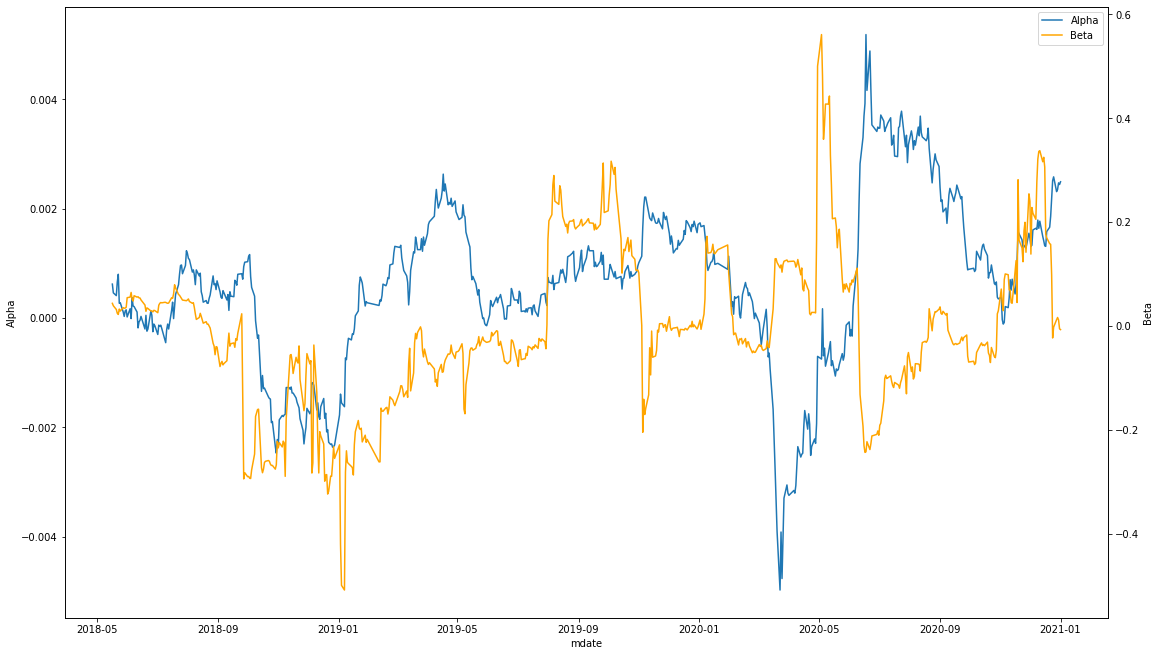

In [16]:
fig, ax1 = plt.subplots(figsize=[16, 9], constrained_layout=True)
ax1.plot(mdate, alpha, label = "Alpha")
ax1_2 = ax1.twinx()
ax1_2.plot(mdate, beta, label = "Beta", color = "orange")

Alpha_lines, Alpha_labels = ax1.get_legend_handles_labels()
Beta_lines, Beta_labels = ax1_2.get_legend_handles_labels()
ax1.legend(Alpha_lines + Beta_lines,
           Alpha_labels + Beta_labels, loc='upper right')

ax1.set_xlabel('mdate')
ax1.set_ylabel('Alpha')
ax1_2.set_ylabel('Beta')

In [17]:
def make_plot(stock_df, aroon_dict, record_df, coid):
    # stock["mdate"] = stock["mdate"].apply(lambda x:x.strftime('%Y-%m-%d'))
    mdate = stock[stock.coid == "Y9997"].mdate

    benchmark = stock[stock.coid == "Y9997"].close_d

    AroonUp = aroon[aroon.coid == coid].AroonUp
    AroonDown = aroon[aroon.coid == coid].AroonDown
    aroon_date = aroon[aroon.coid == coid].mdate


    # Creating figure and axis objects using subplots()
    fig, axes = plt.subplots(2,1, figsize=[16, 9], constrained_layout=True)

    ax1 = axes[0]
    stock[stock.coid == "Y9997"].set_index("mdate").close_d.plot(ax = ax1, label = "market return")
    ax1_2 = ax1.twinx()
    stock[stock.coid == coid].set_index("mdate").close_d.plot(ax = ax1_2, label=f'{coid}_close', color = "lime")
    stock[stock.coid == coid].set_index("mdate").open_d.plot(ax = ax1_2, label=f'{coid}_open', color = "deeppink", alpha = 0.5)
    ax1_2.scatter(df[df.coid == coid].mdate, df[df.coid == coid].DealPrice, label = "BuyOrSell", color = ["orange" if i == "Buy" else "purple" for i in df[df.coid == coid].BuyOrSell])



    benchmark_lines, benchmark_labels = ax1.get_legend_handles_labels()
    target_lines, target_labels = ax1_2.get_legend_handles_labels()

    ax1.legend(benchmark_lines + target_lines,
               benchmark_labels + target_labels, loc='upper right')
    ax1.set_xlabel('mdate')
    ax1.set_ylabel('index')
    ax1_2.set_ylabel(f'price')
    ax1.set_title(f"{coid}_Aroon")

    ax2 = axes[1]
    aroon[aroon.coid == coid].set_index("mdate").AroonUp.plot(ax = ax2, label = "AroonUp", color = "red")
    ax2_2 = ax2.twinx()
    aroon[aroon.coid == coid].set_index("mdate").AroonDown.plot(ax = ax2_2, label = "AroonDown", color = "green")

    up_lines, up_labels = ax2.get_legend_handles_labels()
    down_lines, down_labels = ax2_2.get_legend_handles_labels()

    ax2.legend(down_lines + down_lines,
               up_labels + down_labels, loc='upper right')
    ax2.set_xlabel('mdate')
    ax2.set_ylabel('Aroon_indicator')

    fig.tight_layout()

    plt.show()

/Users/jeremyhsieh/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:30: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(bottom=0.2)


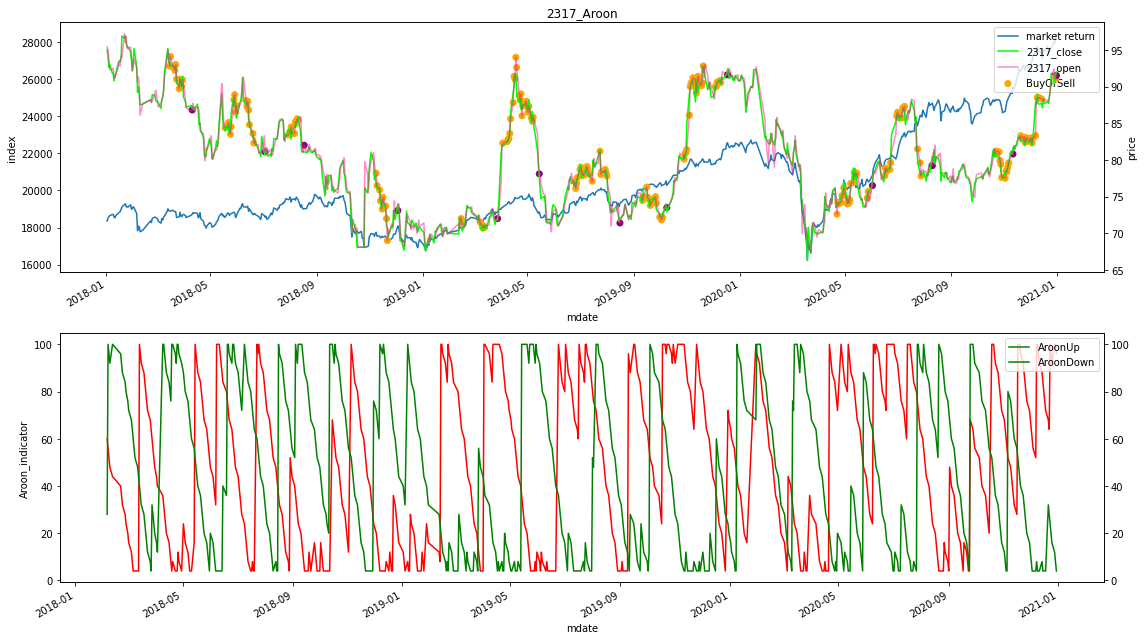

/Users/jeremyhsieh/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:30: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(bottom=0.2)


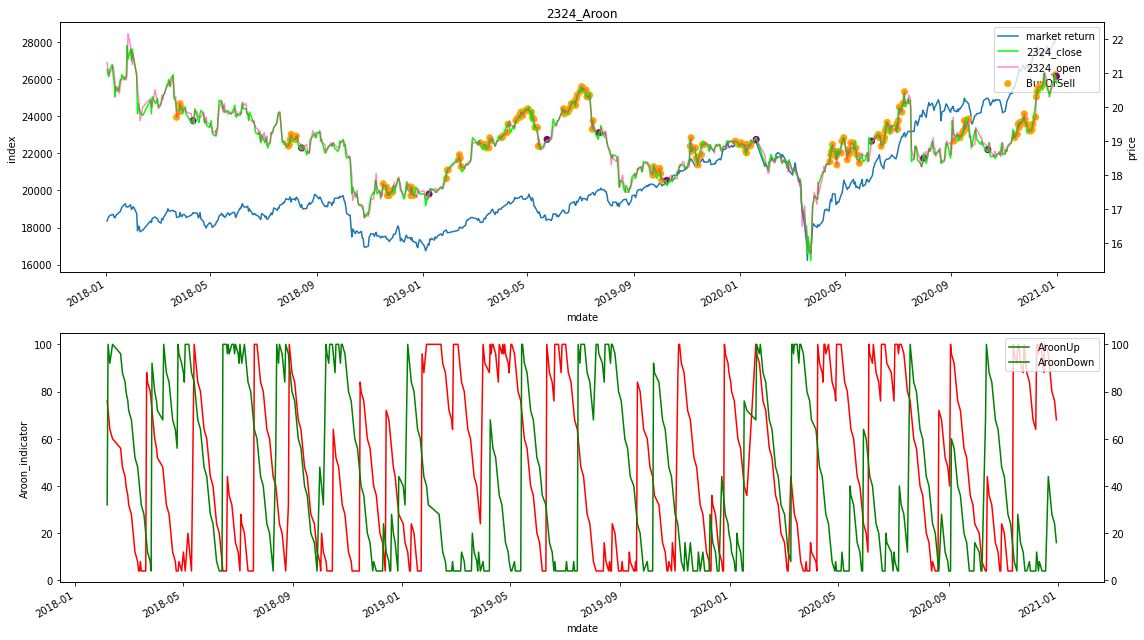

/Users/jeremyhsieh/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:30: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(bottom=0.2)


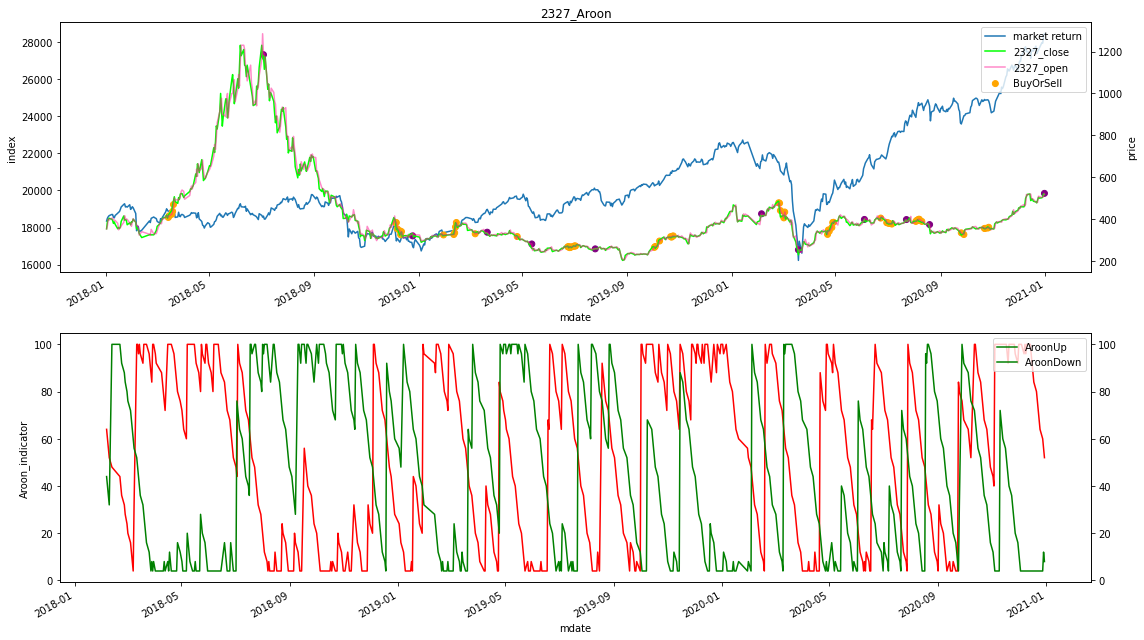

/Users/jeremyhsieh/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:30: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(bottom=0.2)


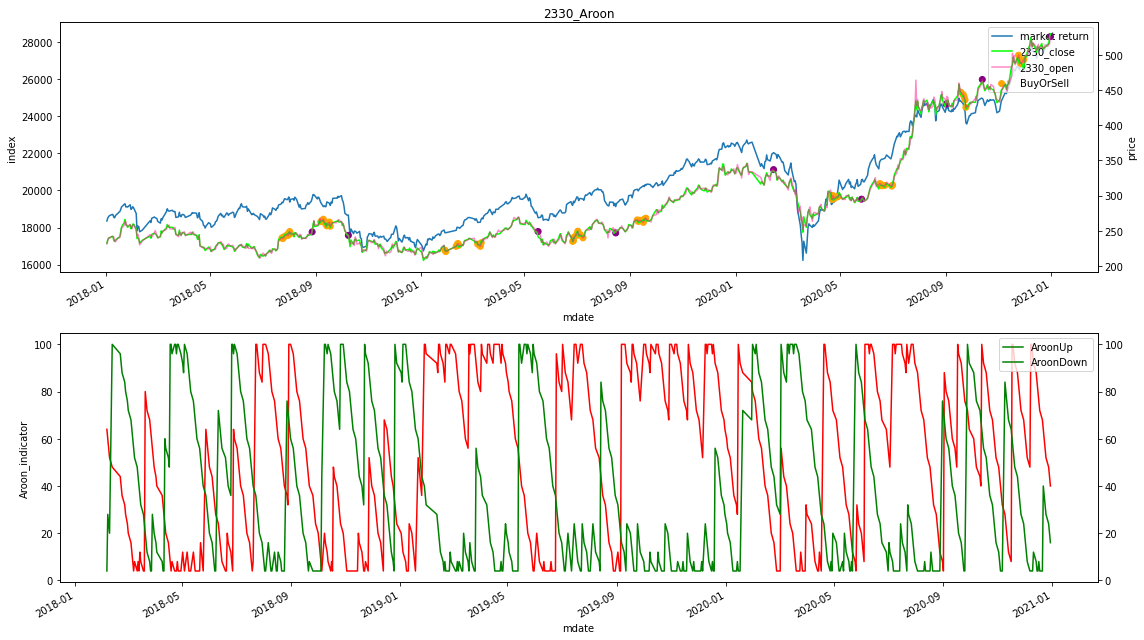

/Users/jeremyhsieh/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:30: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(bottom=0.2)


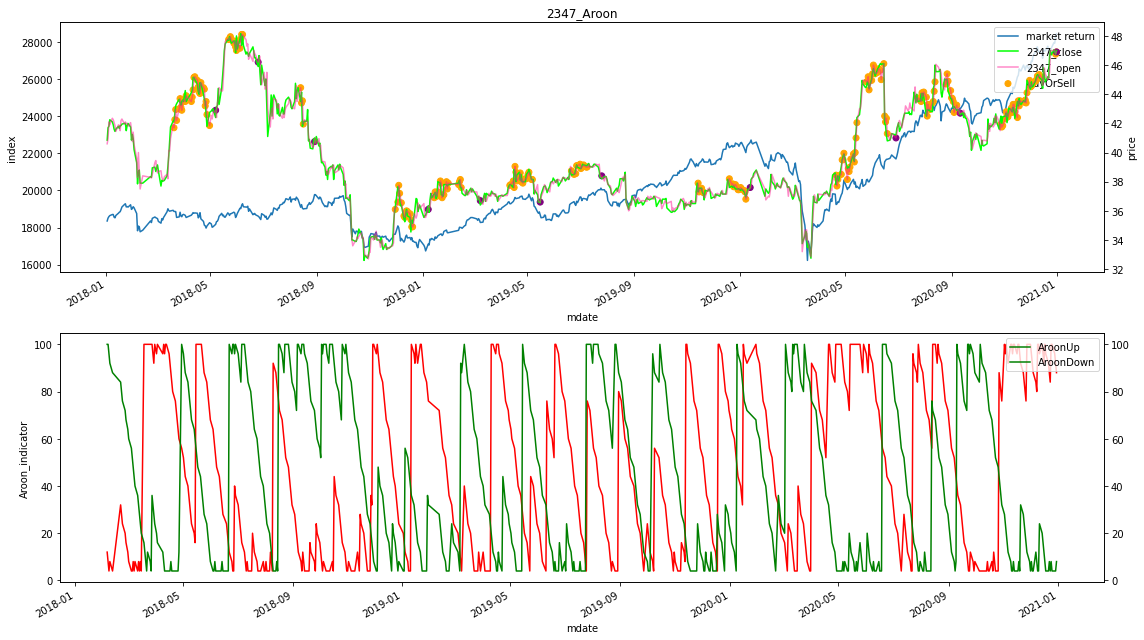

/Users/jeremyhsieh/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:30: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(bottom=0.2)


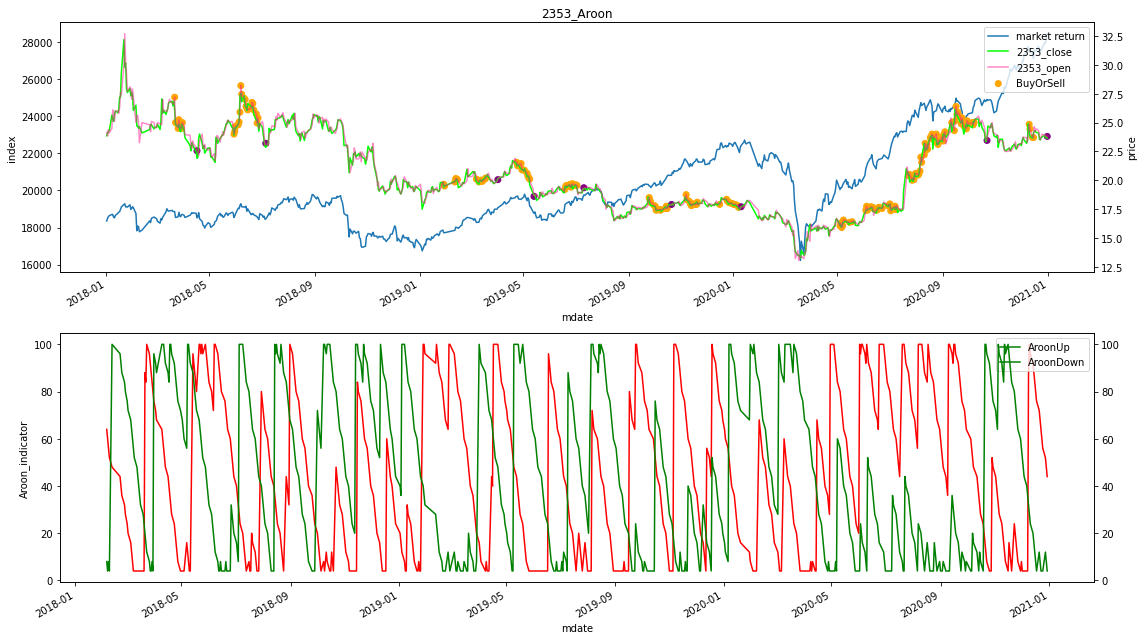

/Users/jeremyhsieh/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:30: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(bottom=0.2)


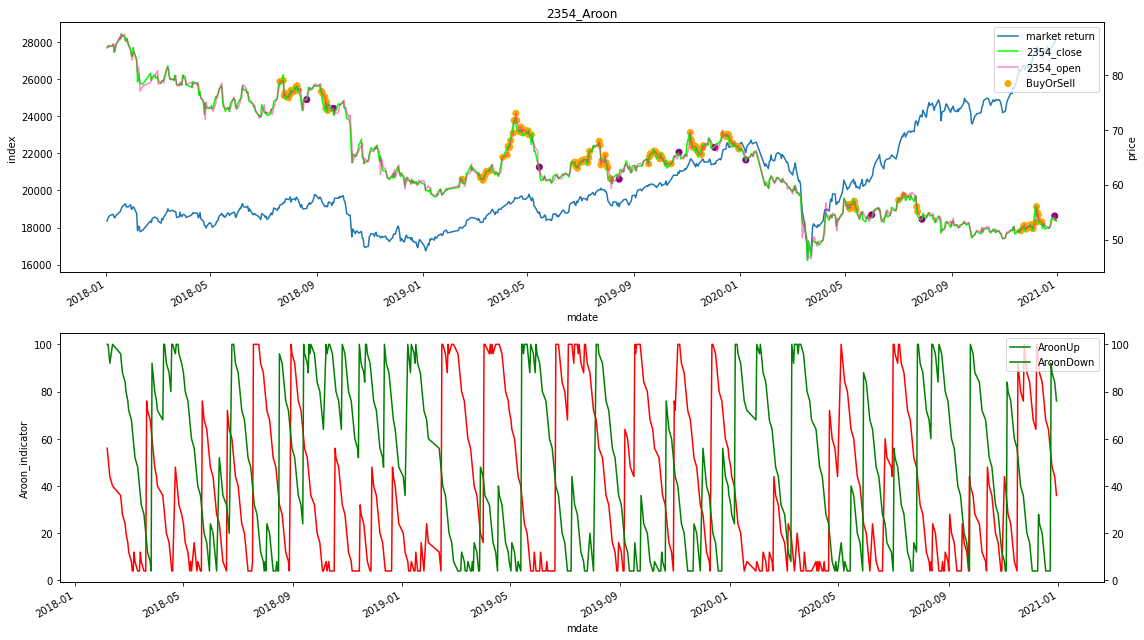

/Users/jeremyhsieh/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:30: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(bottom=0.2)


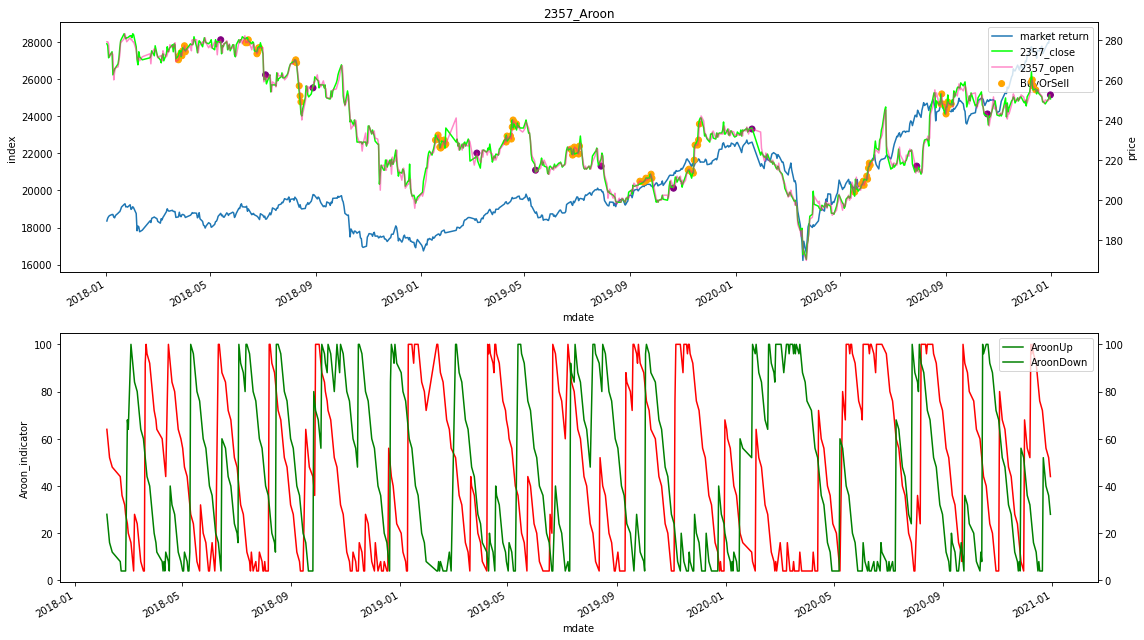

/Users/jeremyhsieh/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:30: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(bottom=0.2)


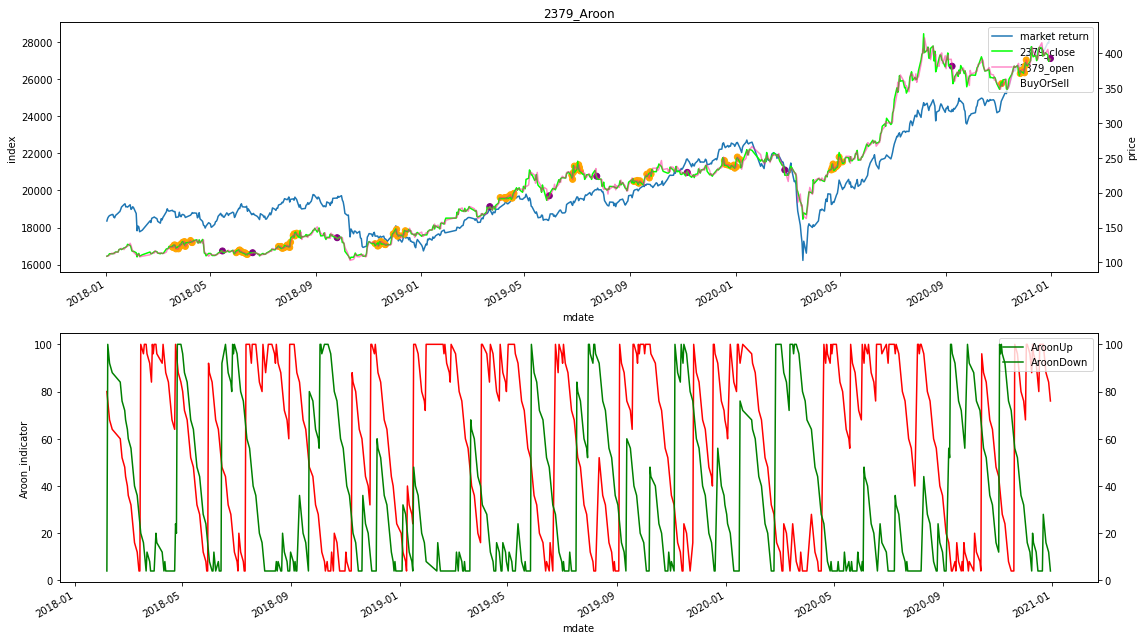

/Users/jeremyhsieh/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:30: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(bottom=0.2)


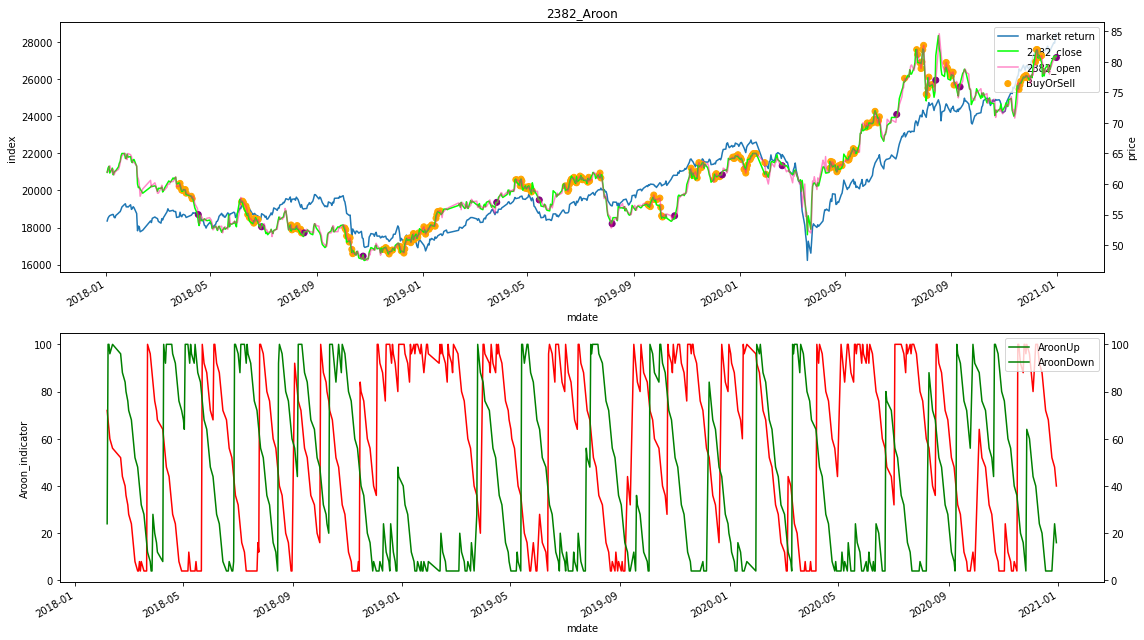

/Users/jeremyhsieh/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:30: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(bottom=0.2)


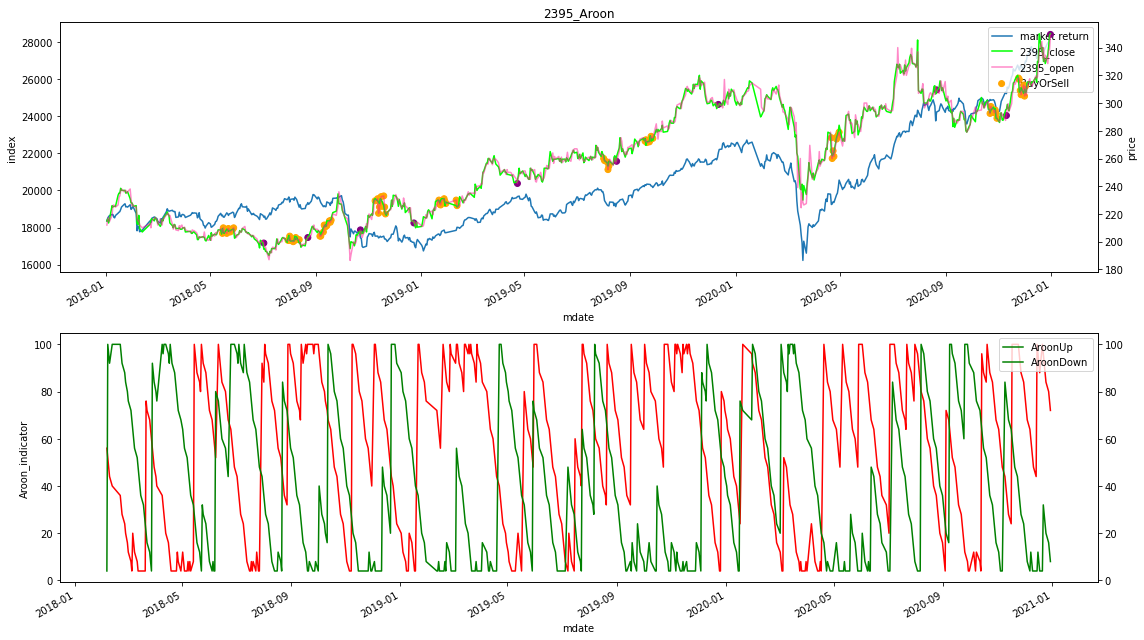

In [18]:
for coid in stock.coid.unique()[:-1]:
    make_plot(stock, aroon, value, coid)